# Data Cleaning & Transformation

## Limpeza de dados em um dataset

**Base utilizada:**
* [Titanic](https://www.kaggle.com/competitions/titanic/data?select=train.csv)

**Legenda:**

* Survival: sobrevivência (0 = não 1 = sim)
* Pclass: Classe do bilhete (1 = 1º, 2 = 2º, 3 = 3º)
* Sex: Gênero
* Age: Idade em anos 
* Sibsp: Nº de irmãos/conjuges a bordo do Titanic
* Parch: Nº de pais/filhos a bordo do Titanic
* Ticket: Número do bilhete
* Fare: Tarifa do passageiro
* Cabin: Número da cabine
* Embarked: Porto de embarcação ( C = Cherbourg, Q = Queenstown, S = Southampton)

## Análise inicial 

In [2]:
# Importando o pandas/numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importando a base
titanic = pd.read_csv('train.csv')

In [4]:
# Visualizando a base
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
# Seu formato
titanic.shape

(891, 12)

In [6]:
# As informações da base (tipo de coluna, linhas não nulas ...)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Resumo estatístico
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Cardinalidade (Quantidade de valores únicos em cada uma das colunas)
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
# Podemos visualizar diretamente os valores vazios fazendo
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Tratamento dos dados

* Começando com o embarque:

In [10]:
# Verificando os registros com embarque vazio
titanic[titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


>Esta informação, pensando em um cenário empresarial, seria coletada com outros times, de acordo com a sua necessidade para o estudo. No caso da base do Titanic, é possível colher essa informação no Google para entender melhor o porque estes valores estão vazios.
>
>Segundo a pesquisa, as duas pessoas embarcaram no porto "S".

In [11]:
# Preenchendo com valores fixos
#titanic.loc[titanic['PassengerId'] == 62, 'Embarked'] = 'S'

In [12]:
#Conferindo se saiu o valor NaN
#titanic[titanic.Embarked.isnull()]

In [13]:
# Confirmando
#titanic.loc[titanic['PassengerId'] == 62, 'Embarked']

In [14]:
# Atualizando o valor para as 2 linhas
titanic.loc[titanic.Embarked.isnull(), 'Embarked'] = 'S'

In [15]:
# Confirmando
titanic[titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


* Analisando a idade

In [16]:
titanic[titanic.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


>Eu poderia, assim como fiz no Embarked, alterar manualmente, mas qual a relevância dessa informação tendo em vista que serão 177 alterações? Se essa informação não for de primordial necessidade, então seria justo, talvez, altera-la com base na média. 
É importante lembrar que existem muitas formas de fazer essa alteração, levando em consideração aquilo que eu preciso para o meu estudo. 

In [17]:
# Podemos verificar o describe para a idade
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

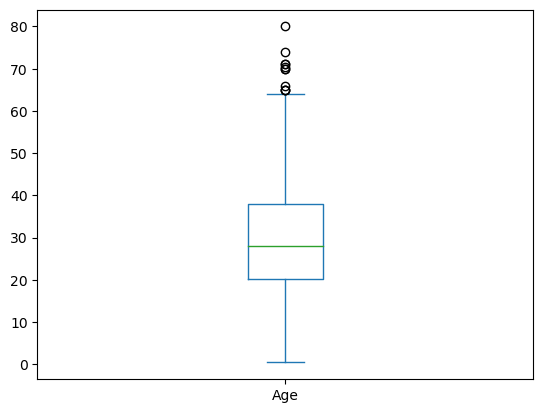

In [18]:
# Podemos verificar isso graficamente no boxplot
titanic.Age.plot.box();

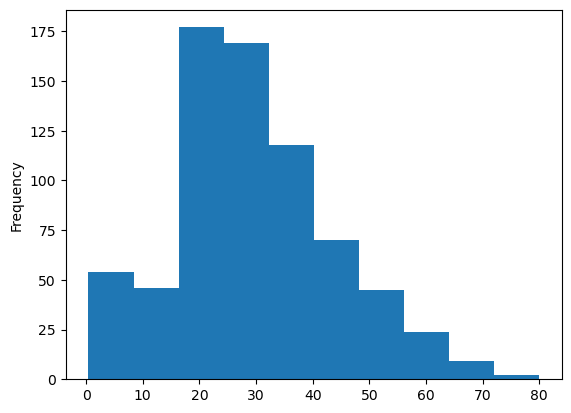

In [19]:
# Podemos verificar isso graficamente no histograma
titanic.Age.plot.hist();

In [20]:
# Uma opção é usar mediana, ou a média das idades
titanic.Age.median()

28.0

In [21]:
# Ou podemos, por exemplo, tirar as média de idade por alguns gruos como o Pclass
titanic.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [22]:
# Podemos adicionar gênero
titanic.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

* Para criar uma nova coluna com esses valores, podemos utilizar o transform do pandas

In [23]:
# Criando uma nova coluna das idades
titanic['Age_check1'] = titanic.groupby(['Pclass', 'Sex'])['Age'].transform('median')

In [24]:
# Visualizando a base
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_check1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,25.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21.5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,25.0


In [25]:
# Podemos diretamente usar esse valor no fillna
titanic['Age_check2'] = titanic.Age.fillna(titanic.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

In [26]:
# visualizando novamente a base agora para conferir onde as idades eram vazias
titanic[titanic.Age.isnull()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_check1,Age_check2
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,25.0,25.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,30.0,30.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,21.5,21.5
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,25.0,25.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,21.5,21.5


In [27]:
# Podemos então usar esse valor na idade
titanic['Age'] = titanic.Age.fillna(titanic.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

In [28]:
# Apagar as 2 colunas que não são mais necessárias
titanic = titanic.drop(['Age_check1', 'Age_check2'], axis=1)

In [29]:
# Confirmando
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# Verificando novamente os valores nulos
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [31]:
# Verificando informações de cabines
titanic.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [32]:
# Eliminando essa coluna
titanic = titanic.drop('Cabin', axis=1)

### Verificando a existência de outliers na base

In [33]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Realmente tivemos uma taxa de $512?

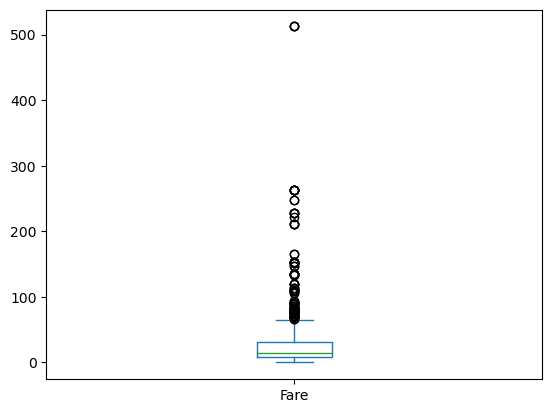

In [34]:
titanic.Fare.plot.box();

In [35]:
titanic[titanic.Fare == titanic.Fare.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


* Considerações dobre os Outliers:
    * Ele faz sentido para o meu modelo ?
    * faz sentido com os outros valores de passagem ?
    * Ele poderia ocorrer novamente ?
    * Já consultei o setor resonsável para entender o motivo ?

**Analisando a base final**

In [36]:
# Base
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [37]:
# Voltando a analisar a cardinalidade
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

* Podemos e devemos eliminar colunas que não me trazem informação alguma, como por exemplo ticket, que me traz um código sem sentido algum que não me informa nada. ou o id do passageiro. Nome seria uma coluna a se considerar nesse caso, mas podemos perceber que ela me traz informações como Mr. Mrs. lady, miss e isso pode me ajudar na criação de algum conteudo futuramente. 

In [38]:
# retirando as colunas passagerId e Ticket
titanic = titanic.drop(['PassengerId', 'Ticket'], axis=1)

In [39]:
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S


In [40]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


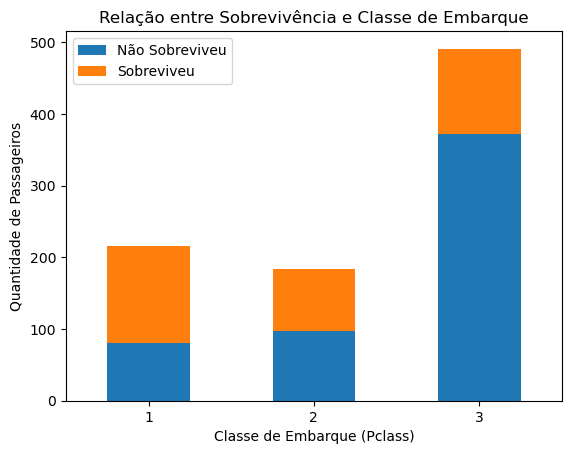

In [41]:
# Contando a quantidade de passageiros sobreviventes (1) e não sobreviventes (0) para cada classe (1, 2 e 3)
survived_by_pclass = titanic.groupby(['Pclass', 'Survived']).size().unstack()

# Criando o gráfico de barras empilhadas
survived_by_pclass.plot(kind='bar', stacked=True)

# Configurando os rótulos do eixo x e do título
plt.xticks(rotation=0)
plt.xlabel('Classe de Embarque (Pclass)')
plt.ylabel('Quantidade de Passageiros')
plt.title('Relação entre Sobrevivência e Classe de Embarque')

# Configurando a legenda para os rótulos "Sobreviveu" e "Não Sobreviveu"
plt.legend(['Não Sobreviveu', 'Sobreviveu'], loc='upper left')

# Exibindo o gráfico
plt.show()


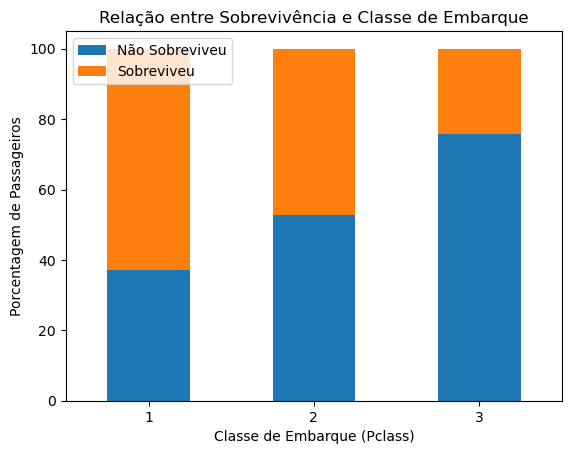

In [42]:
# Contando o total de passageiros por classe
passageiros_por_classe = titanic['Pclass'].value_counts()

# Contando o total de sobreviventes e não sobreviventes por classe
sobreviventes_por_classe = titanic.groupby(['Pclass', 'Survived']).size().unstack()

# Calculando as porcentagens de sobreviventes e não sobreviventes por classe
porcentagens_por_classe = sobreviventes_por_classe.div(sobreviventes_por_classe.sum(axis=1), axis=0) * 100

# Criando o gráfico de barras empilhadas
porcentagens_por_classe.plot(kind='bar', stacked=True)

# Configurando os rótulos do eixo x e do título
plt.xticks(rotation=0)
plt.xlabel('Classe de Embarque (Pclass)')
plt.ylabel('Porcentagem de Passageiros')
plt.title('Relação entre Sobrevivência e Classe de Embarque')

# Configurando a legenda para os rótulos "Sobreviveu" e "Não Sobreviveu"
plt.legend(['Não Sobreviveu', 'Sobreviveu'], loc='upper left')

# Exibindo o gráfico
plt.show()


In [43]:
# Criando a tabela de frequência cruzada entre 'Survived' e 'Pclass'
relacao_survived_pclass = pd.crosstab(titanic['Pclass'], titanic['Survived'])

# Renomeando as colunas para 'Não Sobreviveu' e 'Sobreviveu'
relacao_survived_pclass.columns = ['Não Sobreviveu', 'Sobreviveu']

# Exibindo o novo DataFrame
print(relacao_survived_pclass)


        Não Sobreviveu  Sobreviveu
Pclass                            
1                   80         136
2                   97          87
3                  372         119


In [44]:
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [45]:
#salvando o csv atualizado na pasta junto com o train
titanic.to_csv('titanic_tratado.csv', index=False)

* Passagem gratuita 

In [46]:
# Buscando os passageiros que não tiveram sua passagem cobrada
passagem_gratuita = titanic[titanic['Fare'] == 0].reset_index(drop=True)

In [47]:
passagem_gratuita.count

<bound method DataFrame.count of     Survived  Pclass                              Name   Sex   Age  SibSp  \
0          0       3               Leonard, Mr. Lionel  male  36.0      0   
1          0       1             Harrison, Mr. William  male  40.0      0   
2          1       3      Tornquist, Mr. William Henry  male  25.0      0   
3          0       2       Parkes, Mr. Francis "Frank"  male  30.0      0   
4          0       3   Johnson, Mr. William Cahoone Jr  male  19.0      0   
5          0       2    Cunningham, Mr. Alfred Fleming  male  30.0      0   
6          0       2             Campbell, Mr. William  male  30.0      0   
7          0       2  Frost, Mr. Anthony Wood "Archie"  male  30.0      0   
8          0       3               Johnson, Mr. Alfred  male  49.0      0   
9          0       1     Parr, Mr. William Henry Marsh  male  40.0      0   
10         0       2        Watson, Mr. Ennis Hastings  male  30.0      0   
11         0       2              Knight, M